# Problem Set 5

In [514]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

## 1. When Will we see BOE?
#### 1.

In [515]:
ice = pd.read_csv("../Data/ice-extent.csv.bz2", sep = "\t")
iceN = ice[ice["region"] == "N"]
iceN.drop(iceN.index[iceN['extent'] == -9999], inplace = True)
[~iceN.isna()]
iceN.head()

,year,month,data-type,region,extent,area,time
0,1978,11,Goddard,N,11.65,9.04,1978.875000
2,1978,12,Goddard,N,13.67,10.90,1978.958333
4,1979,1,Goddard,N,15.41,12.41,1979.041667
6,1979,2,Goddard,N,16.18,13.18,1979.125000
8,1979,3,Goddard,N,16.34,13.21,1979.208333


#### 2.

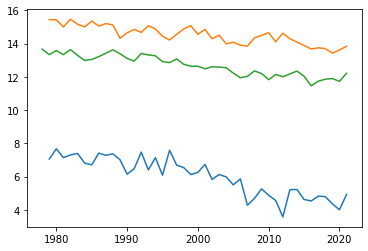

In [249]:
ice9 = iceN[iceN["month"] == 9]
ice12 = iceN[iceN["month"] == 12]
ice4 = iceN[iceN["month"] == 4]
iceG = pd.concat([ice4, ice9, ice12])
_ = plt.plot(ice9.year, ice9.extent, label = "September")
_ = plt.plot(ice4.year, ice4.extent, label = "March")
_ = plt.plot(ice12.year, ice12.extent, label = "December")

##### Blue line = September, Yellow line = March, Green line = December
Separate plots:
#### September

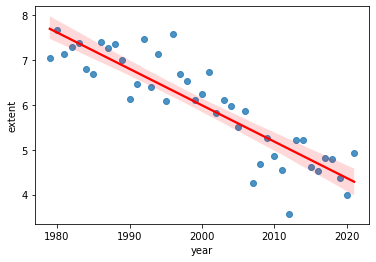

In [228]:
_ = sns.regplot(x = "year", y = "extent",
                line_kws = {"color":"red"}, data = ice9)

#### March

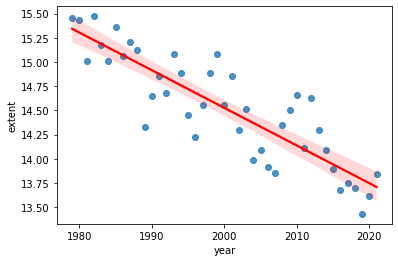

In [229]:
_ = sns.regplot(x = "year", y = "extent",
                line_kws = {"color":"red"}, data = ice4)

#### December

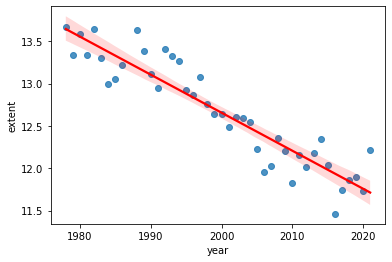

In [230]:
_ = sns.regplot(x = "year", y = "extent",
                line_kws = {"color":"red"}, data = ice12)

#### 3.

In [243]:
ice9.year = ice9.year - 2000
m = smf.ols("extent ~ year", data = ice9).fit()
m.summary()
#DONT RUN AGAIN

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     157.5
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           1.25e-15
Time:                        23:17:14   Log-Likelihood:                -32.417
No. Observations:                  43   AIC:                             68.83
Df Residuals:                      41   BIC:                             72.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9935      0.080     74.629      0.000       5.831       6.156
year          -0.0812      0.006    -12.551      0.000      -0.094      -0.068
==============================================================================
Omnibus:                        2.573   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.525
Skew:                          -0.324   Prob(JB):                        0.467
Kurtosis:                       3.656   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4.
The y-intercept represents the ice extent at year 200 (5.9935). Each year, the ice extent decreases by 0.0812. i.e. in the year 2001 the value for extent is 5.9935 - 0.0812. The data is statistically significant (p < 0.05 etc.).

#### 5.

If we were not using years relative to 2000, the intercept would be essentially meaningless, as it represnents the extent when time = 0. Using years relative to 2000 lets us have a significant intercept, as 0 would be the year 2000.

#### 6.

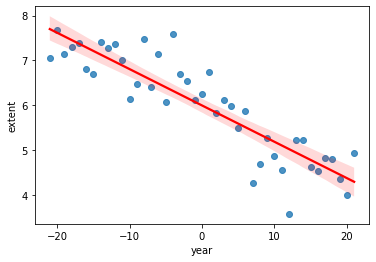

In [245]:
_ = sns.regplot(x = "year", y = "extent",
                line_kws = {"color":"red"}, data = ice9)

We can clearly see a downward trend here, it's hard to tell, but it seems like the downward slope may be accelerating as time goes on.

#### 7.

Equation of regression: y = -0.0812x + 5.9935, plugging 0 into y gives: ~73.81 years after 2000 when we will see a BOE (about 2073).

#### 8.

In [250]:
ice4.year = ice4.year - 2000
m = smf.ols("extent ~ year", data = ice4).fit()
m.summary()
#DONT RUN AGAIN

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     126.7
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           4.08e-14
Time:                        02:58:14   Log-Likelihood:                -5.4465
No. Observations:                  43   AIC:                             14.89
Df Residuals:                      41   BIC:                             18.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5256      0.043    338.652      0.000      14.439      14.612
year          -0.0389      0.003    -11.255      0.000      -0.046      -0.032
==============================================================================
Omnibus:                        0.216   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.897   Jarque-Bera (JB):                0.419
Skew:                           0.016   Prob(JB):                        0.811
Kurtosis:                       2.517   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

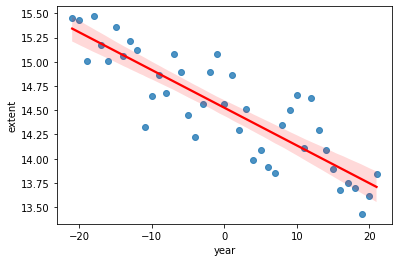

In [248]:
_ = sns.regplot(x = "year", y = "extent",
                line_kws = {"color":"red"}, data = ice4)

Using the regression line equation: y = -0.0389x + 14.5256 and plugging 0 in for y, we can see that with this data BOE would occur 373.4 years after the year 2000 (~2373).

## 2. How is Basketball Game Score Calculated?
#### 1.

In [375]:
flop = pd.read_csv("../Data/harden-18-19.csv.bz2")
flop.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2018-10-17,29-052,HOU,NaN,NOP,L (-19),1,34:43,...,7,9,10,3,1,4,2,18,18.9,-23
1,2,2.0,2018-10-20,29-055,HOU,@,LAL,W (+9),1,37:50,...,6,7,5,2,1,6,2,36,27.0,-3
2,3,3.0,2018-10-21,29-056,HOU,@,LAC,L (-3),1,39:45,...,4,4,14,2,0,3,1,31,26.4,+5
3,4,4.0,2018-10-24,29-059,HOU,NaN,UTA,L (-11),1,31:38,...,4,5,7,1,0,7,4,29,17.7,-5
4,5,NaN,2018-10-26,29-061,HOU,NaN,LAC,L (-20),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive


#### 2.

In [266]:
flop['GS'].value_counts()

1           78
Inactive     4
Name: GS, dtype: int64

James Harden played 78 games and was inactive for 4 games throughout the 82 game regular season.

#### 3.

In [522]:
flop = flop.rename(columns={"Unnamed: 7": "Outcome", "Unnamed: 5": "HomeAway"})
flop["HomeAway"].replace({np.nan: 1, "@": 0}, inplace=True) # 1 represents home, 0 away
flop.loc[flop['Outcome'].astype(str).str.contains('W', na=False), 'Outcome'] = "1"
flop.loc[flop['Outcome'].astype(str).str.contains('L', na=False), 'Outcome'] = "0"  # 1 denotes a win, 0 represents a loss
flop["Outcome"] = pd.to_numeric(flop["Outcome"])
flop.replace({"Inactive": 0}, inplace=True) # inactive is now denoted as 0 in GS
flop.rename(columns={"Unnamed: 7": "Outcome", "Unnamed: 5": "Home/Away"})
flop = flop[flop['G'].notna()]
flop['GmSc'] = pd.to_numeric(flop['GmSc'], errors='coerce')
flop.head()

,Rk,G,Date,Age,Tm,HomeAway,Opp,Outcome,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2018-10-17,29-052,HOU,1,NOP,0,1,34:43,...,7,9,10,3,1,4,2,18,18.9,-23
1,2,2.0,2018-10-20,29-055,HOU,0,LAL,1,1,37:50,...,6,7,5,2,1,6,2,36,27.0,-3
2,3,3.0,2018-10-21,29-056,HOU,0,LAC,0,1,39:45,...,4,4,14,2,0,3,1,31,26.4,+5
3,4,4.0,2018-10-24,29-059,HOU,1,UTA,0,1,31:38,...,4,5,7,1,0,7,4,29,17.7,-5
7,8,5.0,2018-11-03,29-069,HOU,0,CHI,1,1,33:16,...,1,1,7,4,0,8,3,25,15.1,+9


#### 4.

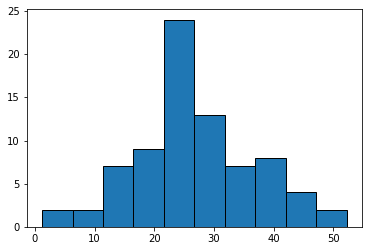

In [525]:
Gscore = flop[["GmSc","G"]]
Gscore['GmSc'] = pd.to_numeric(Gscore['GmSc'], errors='coerce')
Gscore.set_index('G', inplace=True, drop=True)
_ = plt.hist(Gscore, bins = 'auto', edgecolor = 'black')

In [526]:
print(Gscore.GmSc.describe()) # Stats 
print("The range is: ", Gscore.GmSc.max() - Gscore.GmSc.min())

count    78.000000
mean     26.708974
std      10.053883
min       1.200000
25%      21.225000
50%      25.800000
75%      32.150000
max      52.200000
Name: GmSc, dtype: float64
The range is:  51.0


Histogram looks fairly normal to me!

#### 5.

In [527]:
fig5 = flop[["GmSc","G", "FGA"]]
fig5['FGA'] = pd.to_numeric(fig5['FGA'], errors='coerce')
fig5.set_index('G', inplace=True, drop=True)
m = smf.ols("GmSc ~ FGA", data = fig5).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     13.54
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           0.000433
Time:                        06:58:52   Log-Likelihood:                -283.80
No. Observations:                  78   AIC:                             571.6
Df Residuals:                      76   BIC:                             576.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5963      4.240      2.735      0.008       3.152      20.041
FGA            0.6175      0.168      3.680      0.000       0.283       0.952
==============================================================================
Omnibus:                        0.602   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.739
Skew:                          -0.137   Prob(JB):                        0.691
Kurtosis:                       2.609   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Figure 5*

- (a). The intercept here represents James Hardens' game score when he has 0 FGA.
- (b). FGA represents the change in James Hardens' game score when he attempts x amount of field goals in a game (GmSc goes up 0.6175 per FGA), this value is statistically significant.

#### 6.

In [529]:
fig6 = flop[["GmSc","G", "FGA", "FG"]]
fig6['FGA'] = pd.to_numeric(fig6['FGA'], errors='coerce')
fig6['FG'] = pd.to_numeric(fig6['FG'], errors='coerce')
fig6.set_index('G', inplace=True, drop=True)
m = smf.ols("GmSc ~ FG + FGA", data = fig6).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     50.42
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           1.33e-14
Time:                        06:59:00   Log-Likelihood:                -256.97
No. Observations:                  78   AIC:                             519.9
Df Residuals:                      75   BIC:                             527.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8608      3.075      2.231      0.029       0.735      12.987
FG             3.4082      0.396      8.616      0.000       2.620       4.196
FGA           -0.6940      0.194     -3.584      0.001      -1.080      -0.308
==============================================================================
Omnibus:                        2.958   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                1.904
Skew:                           0.154   Prob(JB):                        0.386
Kurtosis:                       2.299   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Figure 6*

- (a). FG represents the change in James Hardens' game score per FG made (GmSc goes up 3.4082 per FG made). This value is statistically significant.
- (b). FGA represents the change in James Hardens' game score when he attempts x amount of field goals in a game (GmSc goes down 0.6940 per FGA), this value is statistically significant.
- (c). FG's are made baskets, meaning James Harden didn't miss. With FGA there's the chance that he will miss the basket. When there are 2 factors affecting GmSc in this model, FGA is not as influential as it was in model 5.
- (d). R^2 = 0.562, compared to model 5 R^2: 0.14. Since the R^2 of model 6 ishigher, it is a much better and more accurate model to predict GmSc.

#### 7.

In [542]:
fig7 = flop[["GmSc","G", "FGA", "FG", "3P", "3PA", "FT", "FTA", "ORB", "DRB", "AST", "STL", "BLK", "TOV", "PF"]]
fig7.rename(columns={"3P": "ThreeP", "3PA": "ThreePA"})
fig7['FGA'] = pd.to_numeric(fig7['FGA'], errors='coerce')
fig7['FG'] = pd.to_numeric(fig7['FG'], errors='coerce')
fig7['ThreeP'] = pd.to_numeric(fig7['3P'], errors='coerce')
fig7['ThreePA'] = pd.to_numeric(fig7['3PA'], errors='coerce')
fig7['FT'] = pd.to_numeric(fig7['FT'], errors='coerce')
fig7['FTA'] = pd.to_numeric(fig7['FTA'], errors='coerce')
fig7['ORB'] = pd.to_numeric(fig7['ORB'], errors='coerce')
fig7['DRB'] = pd.to_numeric(fig7['DRB'], errors='coerce')
fig7['AST'] = pd.to_numeric(fig7['AST'], errors='coerce')
fig7['STL'] = pd.to_numeric(fig7['STL'], errors='coerce')
fig7['BLK'] = pd.to_numeric(fig7['BLK'], errors='coerce')
fig7['TOV'] = pd.to_numeric(fig7['TOV'], errors='coerce')
fig7['PF'] = pd.to_numeric(fig7['PF'], errors='coerce')
fig7.set_index('G', inplace=True, drop=True)
m = smf.ols("GmSc ~ FG + FGA + ThreeP + ThreePA + FT + FTA + ORB + DRB + AST + STL + BLK + TOV + PF", data = fig7).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.972e+28
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        07:06:44   Log-Likelihood:                 2237.8
No. Observations:                  78   AIC:                            -4448.
Df Residuals:                      64   BIC:                            -4415.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.553e-15   6.57e-14     -0.054      0.957   -1.35e-13    1.28e-13
FG             2.4000   7.96e-15   3.02e+14      0.000       2.400       2.400
FGA           -0.7000    4.6e-15  -1.52e+14      0.000      -0.700      -0.700
ThreeP         1.0000   8.87e-15   1.13e+14      0.000       1.000       1.000
ThreePA    -6.661e-16   5.99e-15     -0.111      0.912   -1.26e-14    1.13e-14
FT             1.4000   1.05e-14   1.34e+14      0.000       1.400       1.400
FTA           -0.4000   9.45e-15  -4.23e+13      0.000      -0.400      -0.400
ORB            0.7000   1.23e-14   5.71e+13      0.000       0.700       0.700
DRB            0.3000   4.59e-15   6.54e+13      0.000       0.300       0.300
AST            0.7000   3.42e-15   2.04e+14      0.000       0.700       0.700
STL            1.0000   7.81e-15   1.28e+14      0.000       1.000       1.000
BLK            0.7000   1.42e-14   4.92e+13      0.000       0.700       0.700
TOV           -1.0000   5.79e-15  -1.73e+14      0.000      -1.000      -1.000
PF            -0.4000   8.78e-15  -4.56e+13      0.000      -0.400      -0.400
==============================================================================
Omnibus:                        2.348   Durbin-Watson:                   0.127
Prob(Omnibus):                  0.309   Jarque-Bera (JB):                1.590
Skew:                          -0.107   Prob(JB):                        0.451
Kurtosis:                       2.334   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- (a). Standard errors are all very small. The T-values are also mostly all very small, the largest t value is 0.111 for 3 point attempts.
- (b). The R^2 is 1, which means the model can predict everything. This tells us that GmSc takes all these x values into consideration.
- (c). Turnovers are bad for the team, and are also bad for indiviual game score. You never want to turn the ball over.

#### 8.
The formula is the same except for the fact that we have 3pt stats in our model and the explanation doesn't.

## 3. Interpret Regression Results in the Literature

#### 1.
Those who have partners have better mental health, although it isn't statistically significant.
#### 2.
COVID exposure means worse mental health, and this number is not significant.
#### 3.
Financial distress is much worse for mental health, and this number is statistically significant.

I spent 5 hours on this problem set.